In [1]:
!pip install pandas numpy matplotlib seaborn ipywidgets

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('combined_data_2023_2024.csv')


# 날짜 문자열을 datetime 객체로 변환 (ISO8601 형식)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import widgets
from IPython.display import display
import calendar

IntSlider(value=2023, description='Year:', max=2024, min=2023)

IntSlider(value=5, description='Month:', max=12, min=1)

Button(description='Show Heatmap', style=ButtonStyle())

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


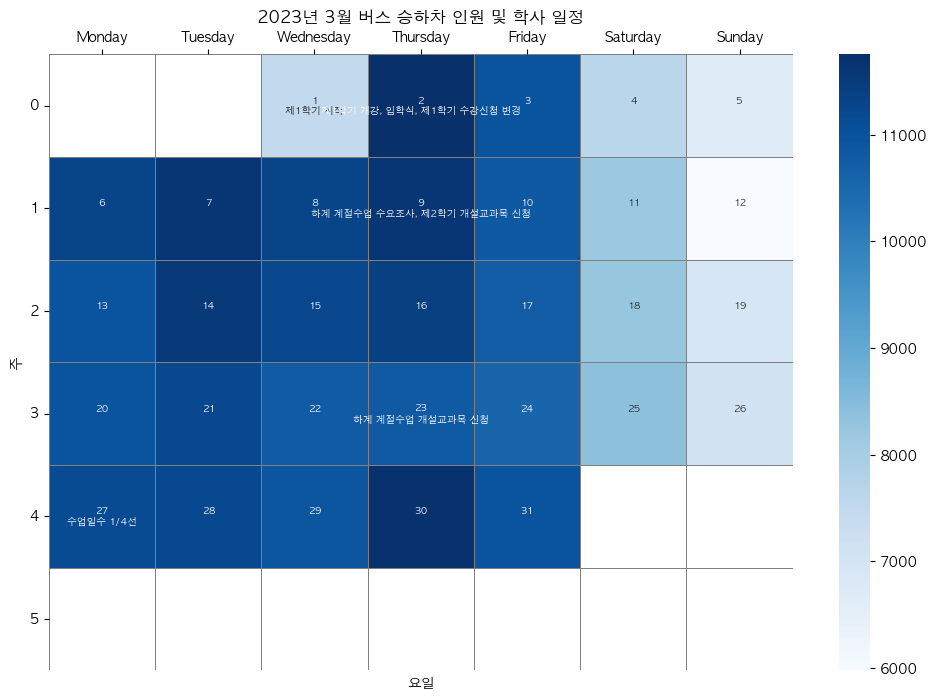

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


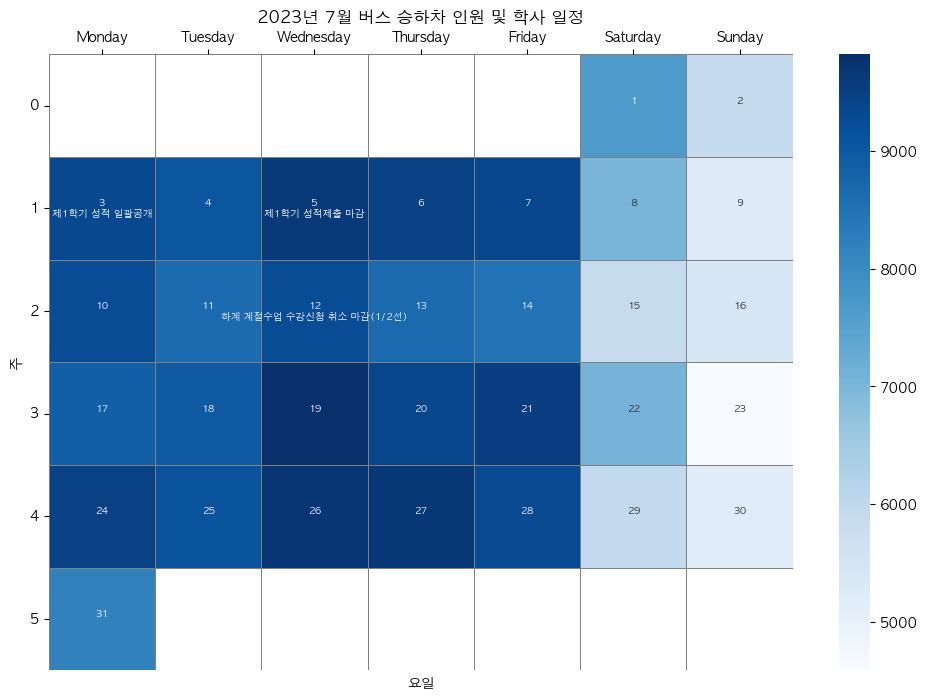

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


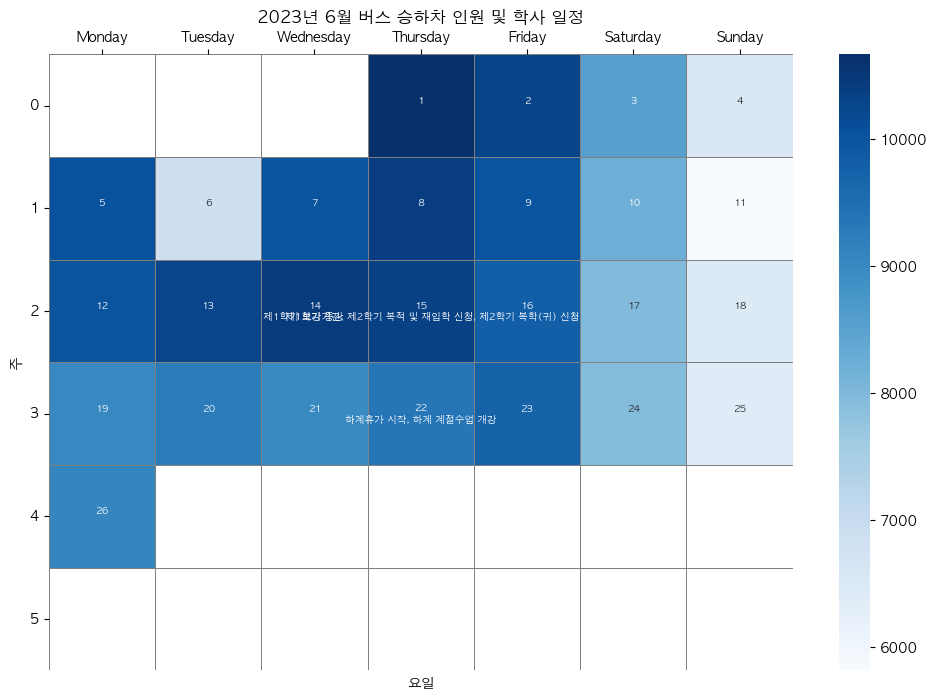

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


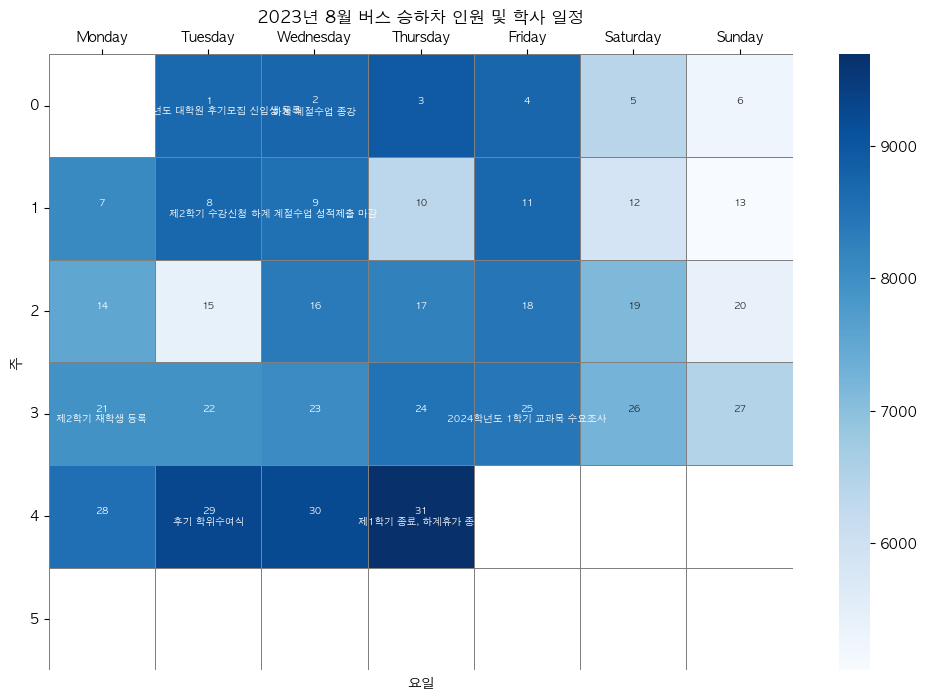

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


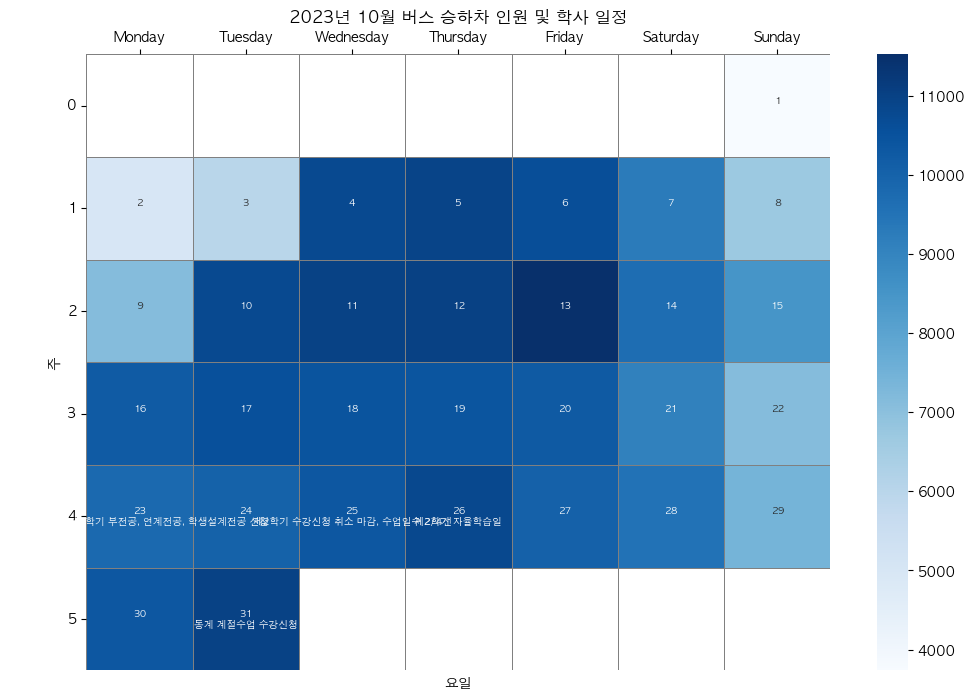

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


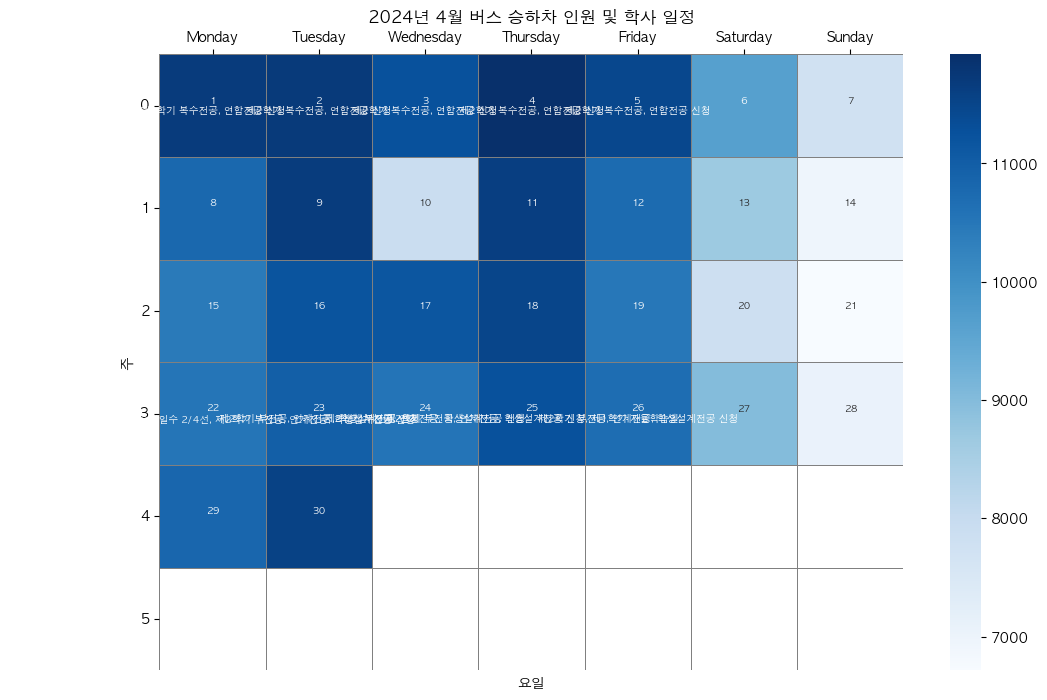

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


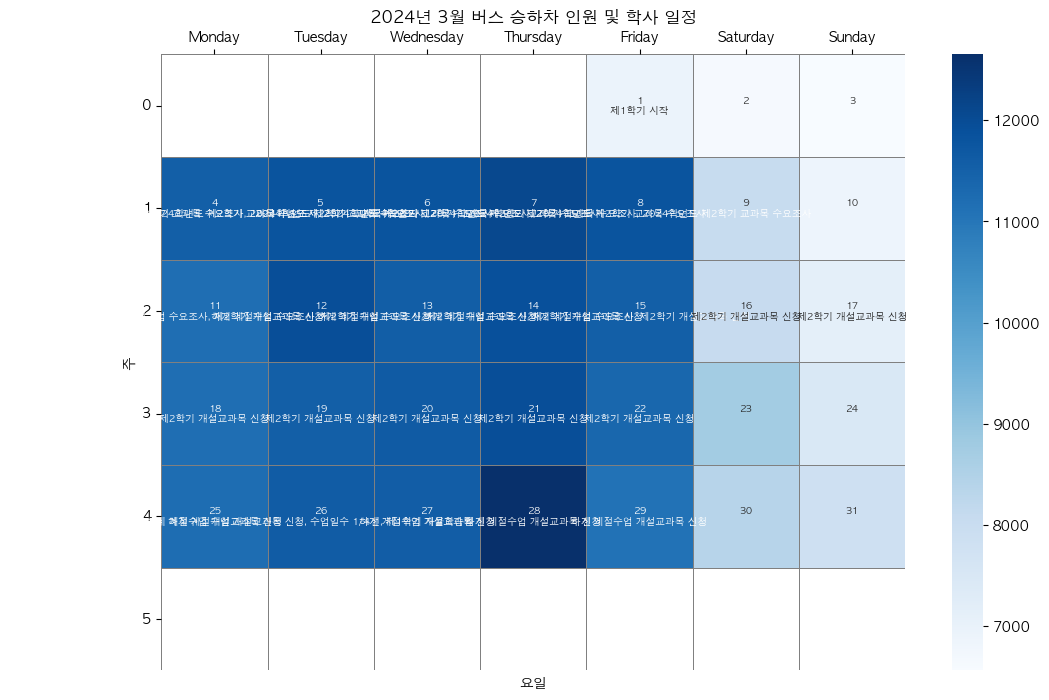

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


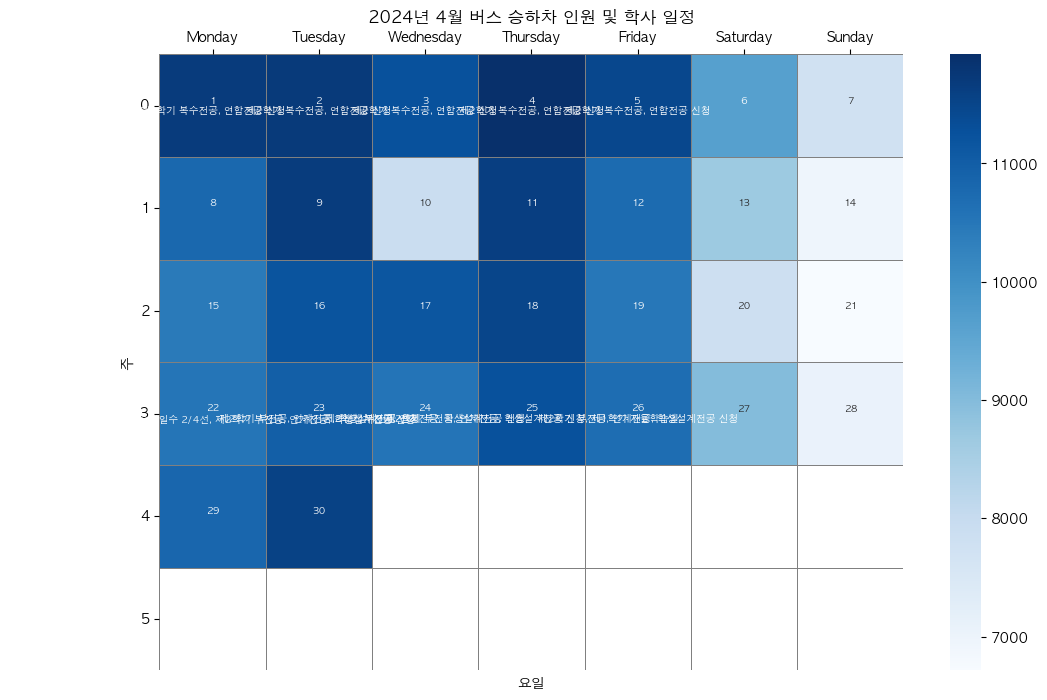

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


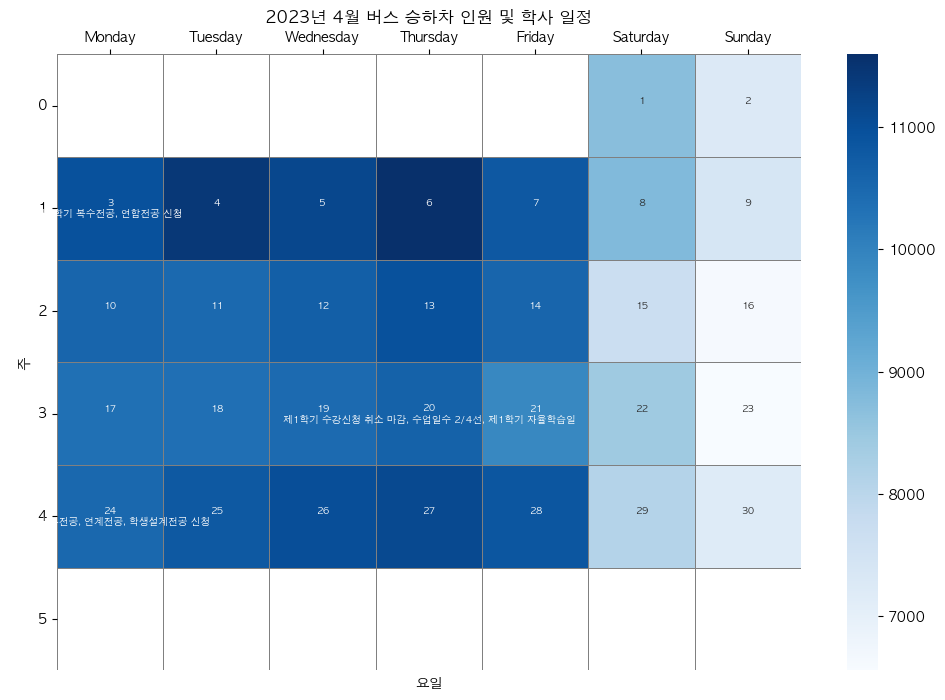

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/1396726107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


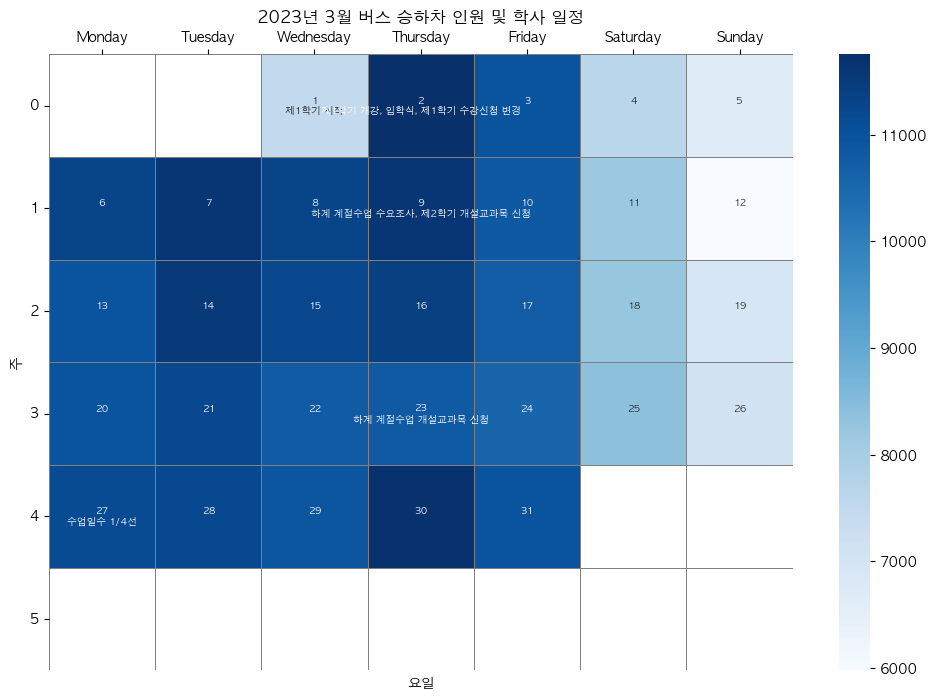

In [8]:
# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

# 데이터 로드 및 준비
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# 히트맵 그리기 함수
def draw_calendar_heatmap(year, month):
    mask = (data['Date'].dt.year == year) & (data['Date'].dt.month == month)
    df = data.loc[mask]
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday

    # 월의 시작 요일과 일수 계산
    first_day = df.iloc[0]['Date']
    start_day = first_day.weekday()  # 월의 첫 날 요일 (0=월요일, 6=일요일)

    # 데이터 배열 생성
    passenger_data = np.full((6, 7), np.nan)  # 승하차 인원 데이터
    annotations = np.full((6, 7), '', dtype=object)  # 어노테이션 데이터

    for _, row in df.iterrows():
        # 해당 날짜의 주와 요일 계산
        day_offset = (row['Day'] - 1 + start_day) % 7
        week_offset = (row['Day'] - 1 + start_day) // 7
        passenger_data[week_offset, day_offset] = row['boarding_count']
        annotations[week_offset, day_offset] = f"{row['Day']}\n" + (f"{row['Event']}" if pd.notna(row['Event']) else "")

    # 히트맵 생성
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(passenger_data, annot=annotations, fmt='', cmap="Blues", linewidths=.5, linecolor='grey',
                     cbar=True, annot_kws={'size': 7})
    ax.set_title(f'{year}년 {month}월 버스 승하차 인원 및 학사 일정')
    ax.set_xlabel('요일')
    ax.set_ylabel('주')
    ax.set_xticks(np.arange(0.5, 7.5))
    ax.set_xticklabels(list(calendar.day_name))  # 요일 이름
    ax.xaxis.tick_top()  # X축을 상단으로 이동
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

# 사용자 인터페이스
year_selector = widgets.IntSlider(value=2023, min=2023, max=2024, description='Year:')
month_selector = widgets.IntSlider(value=5, min=1, max=12, description='Month:')
button = widgets.Button(description="Show Heatmap")

def on_button_clicked(b):
    draw_calendar_heatmap(year_selector.value, month_selector.value)

button.on_click(on_button_clicked)
display(year_selector, month_selector, button)


IntSlider(value=2023, description='Year:', max=2024, min=2023)

IntSlider(value=5, description='Month:', max=12, min=1)

Button(description='Show Heatmap', style=ButtonStyle())

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


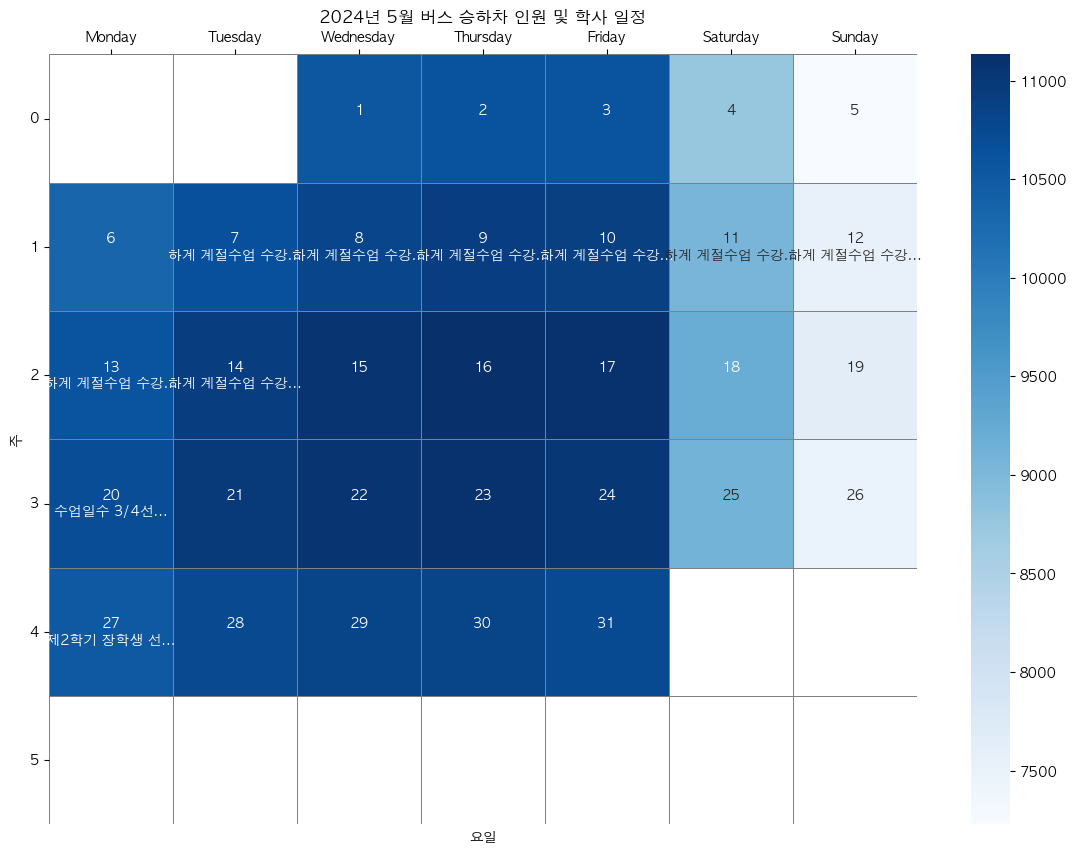

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


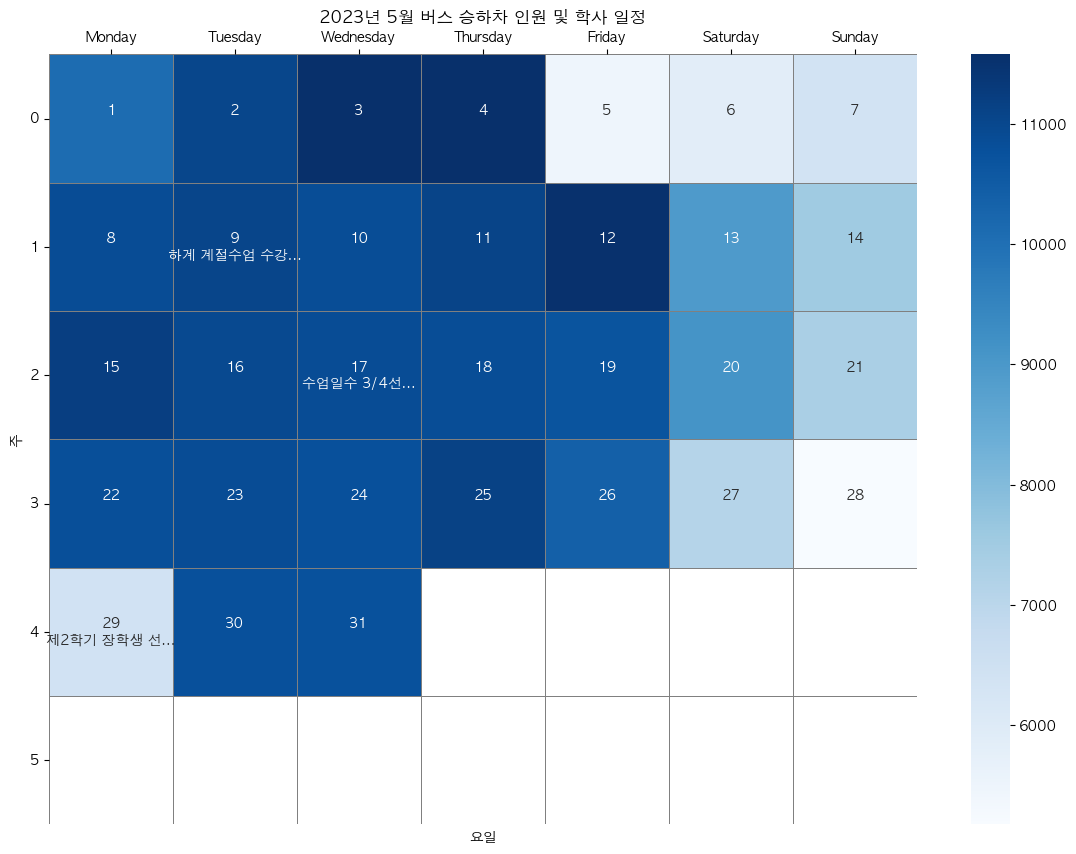

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


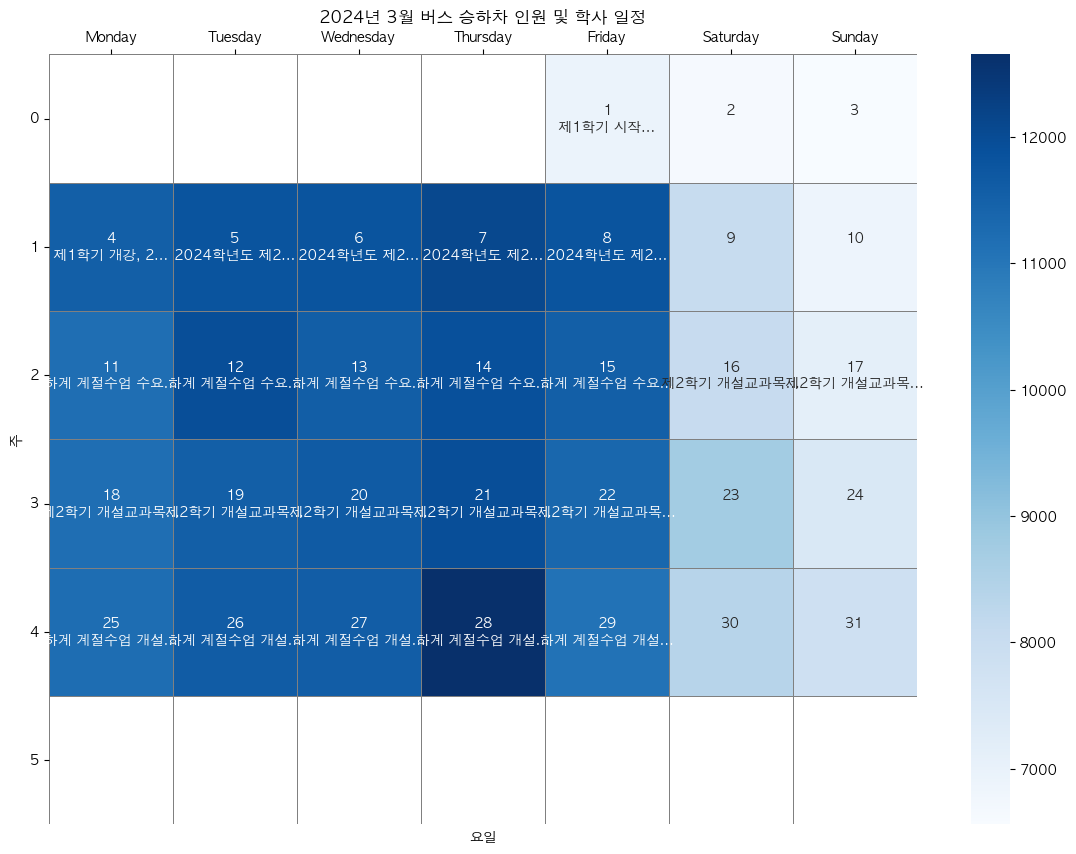

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


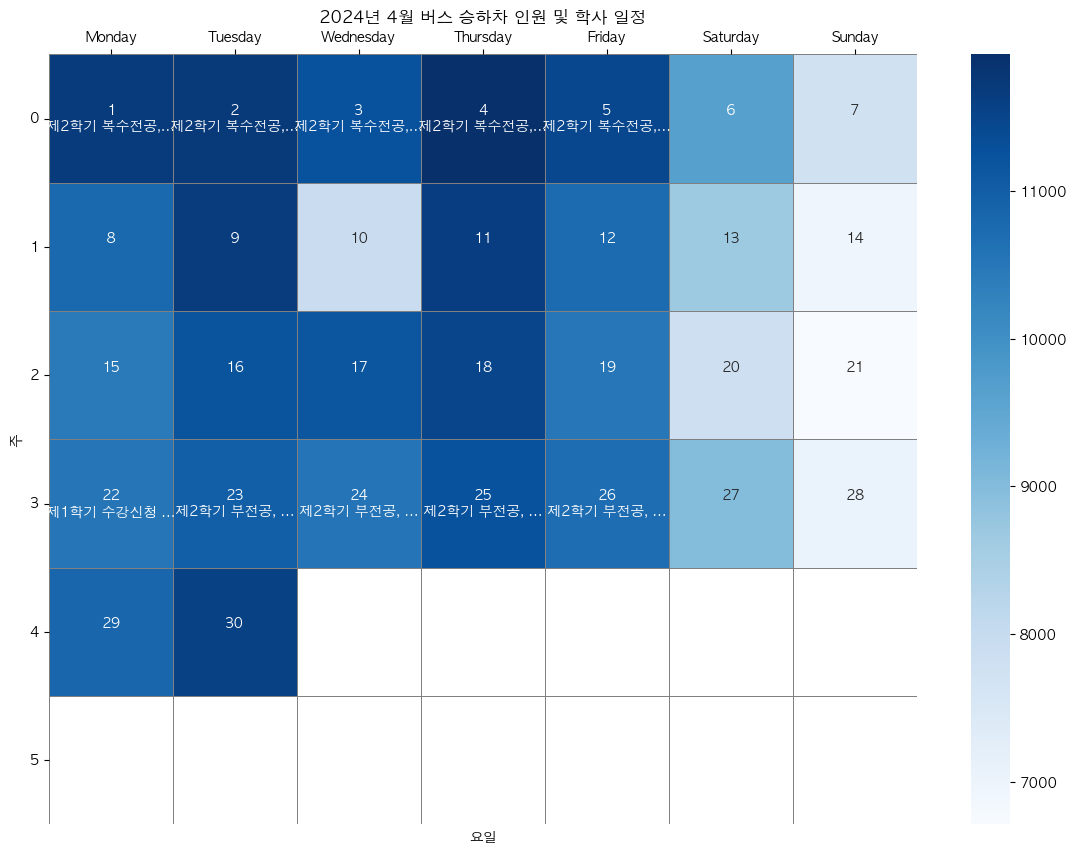

/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/var/folders/mp/k72ncwhx7qjbmkmj5mrx6tpr0000gn/T/ipykernel_55655/2875777792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday


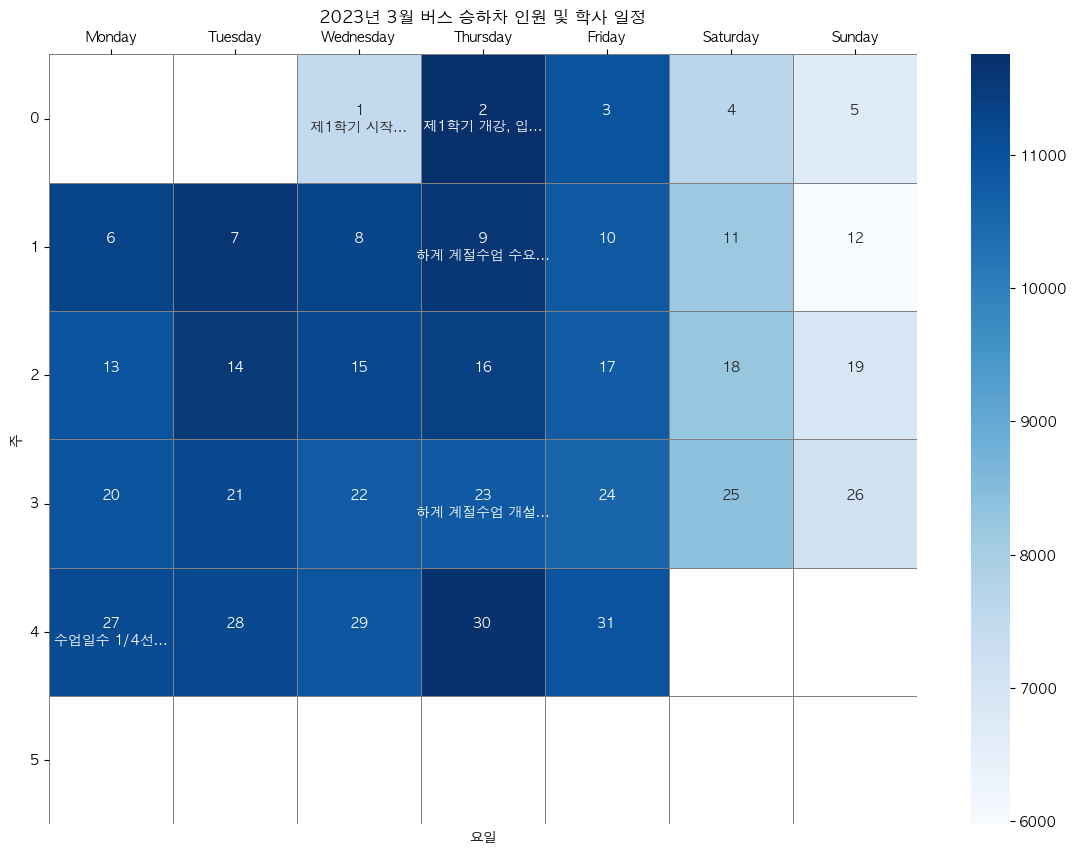

In [7]:
# 히트맵 그리기 함수
def draw_calendar_heatmap(year, month):
    mask = (data['Date'].dt.year == year) & (data['Date'].dt.month == month)
    df = data.loc[mask]
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday

    # 월의 시작 요일과 일수 계산
    first_day = df.iloc[0]['Date']
    start_day = first_day.weekday()  # 월의 첫 날 요일 (0=월요일, 6=일요일)

    # 데이터 배열 생성
    passenger_data = np.full((6, 7), np.nan)  # 승하차 인원 데이터
    annotations = np.full((6, 7), '', dtype=object)  # 어노테이션 데이터

    for _, row in df.iterrows():
        # 해당 날짜의 주와 요일 계산
        day_offset = (row['Day'] - 1 + start_day) % 7
        week_offset = (row['Day'] - 1 + start_day) // 7
        passenger_data[week_offset, day_offset] = row['boarding_count']
        # 이벤트 정보 축약
        event_text = (f"{row['Event'][:10]}..." if pd.notna(row['Event']) else "")
        annotations[week_offset, day_offset] = f"{row['Day']}\n{event_text}"

    # 히트맵 생성
    plt.figure(figsize=(14, 10))  # 그래프 크기 조정
    ax = sns.heatmap(passenger_data, annot=annotations, fmt='', cmap="Blues", linewidths=.5, linecolor='grey',
                     cbar=True, annot_kws={'size': 10})  # 폰트 크기 조정
    ax.set_title(f'{year}년 {month}월 버스 승하차 인원 및 학사 일정')
    ax.set_xlabel('요일')
    ax.set_ylabel('주')
    ax.set_xticks(np.arange(0.5, 7.5))
    ax.set_xticklabels(list(calendar.day_name))  # 요일 이름
    ax.xaxis.tick_top()  # X축을 상단으로 이동
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()
    
# 사용자 인터페이스
year_selector = widgets.IntSlider(value=2023, min=2023, max=2024, description='Year:')
month_selector = widgets.IntSlider(value=5, min=1, max=12, description='Month:')
button = widgets.Button(description="Show Heatmap")

def on_button_clicked(b):
    draw_calendar_heatmap(year_selector.value, month_selector.value)

button.on_click(on_button_clicked)
display(year_selector, month_selector, button)